# Sales strategy for a Video's Games Company: Summer season

#### Objetive: analysis Video Games sales to determine the sales strategy for the company in their upcoming Summer season.    

### I. Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### II. Load set

In [8]:
df = pd.read_csv("vgsales.csv")

##### Preview database

In [10]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16709,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.0,0.01,63.0,6.0,5.8,8.0,DTP Entertainment,NaN
16710,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01,NaN,NaN,tbd,NaN,Atari,T
16711,Aiyoku no Eustia,PSV,2014.0,Misc,dramatic create,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16713,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(16719, 16)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [15]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [16]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [17]:
df.isnull().values.any()

True

##### Describe data

In [19]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


#### Import name of the columns

In [21]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

### III. Data Cleaning & Preparation

##### Drop rows with essential missing values

In [24]:
df = df.dropna(subset=["Name", "Genre", "Year_of_Release"]).copy()

##### Fill missing categorical values with placeholders

In [26]:
df["Publisher"] = df["Publisher"].fillna("Unknown")
df["Developer"] = df["Developer"].fillna("Unknown")
df["Rating"] = df["Rating"].fillna("Unrated")

##### Convert data types

In [28]:
df["Year_of_Release"] = df["Year_of_Release"].astype(int)
df["User_Score"] = pd.to_numeric(df["User_Score"], errors="coerce")

##### Rename columns for easier access

In [30]:
df.rename(columns={
    "Name": "name", "Platform": "platform", "Year_of_Release": "year", "Genre": "genre",
    "Publisher": "publisher", "NA_Sales": "na_sales", "EU_Sales": "eu_sales",
    "JP_Sales": "jp_sales", "Other_Sales": "other_sales", "Global_Sales": "global_sales",
    "Critic_Score": "critic_score", "Critic_Count": "critic_count",
    "User_Score": "user_score", "User_Count": "user_count", "Developer": "developer",
    "Rating": "rating"
}, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16448 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16448 non-null  object 
 1   platform      16448 non-null  object 
 2   year          16448 non-null  int32  
 3   genre         16448 non-null  object 
 4   publisher     16448 non-null  object 
 5   na_sales      16448 non-null  float64
 6   eu_sales      16448 non-null  float64
 7   jp_sales      16448 non-null  float64
 8   other_sales   16448 non-null  float64
 9   global_sales  16448 non-null  float64
 10  critic_score  7983 non-null   float64
 11  critic_count  7983 non-null   float64
 12  user_score    7463 non-null   float64
 13  user_count    7463 non-null   float64
 14  developer     16448 non-null  object 
 15  rating        16448 non-null  object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.1+ MB


In [32]:
df.describe(include='all')

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
count,16448,16448,16448.000000,16448,16448,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,7463.000000,7463.000000,16448,16448
unique,11429,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1681,9
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unrated
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6541,6679
mean,NaN,NaN,2006.488996,NaN,NaN,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,7.126330,163.015141,NaN,NaN
std,NaN,NaN,5.877470,NaN,NaN,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,1.499447,563.863327,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,0.000000,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,6.400000,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,7.500000,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,8.200000,81.000000,NaN,NaN


In [33]:
df.info

<bound method DataFrame.info of                                 name platform  year         genre  \
0                         Wii Sports      Wii  2006        Sports   
1                  Super Mario Bros.      NES  1985      Platform   
2                     Mario Kart Wii      Wii  2008        Racing   
3                  Wii Sports Resort      Wii  2009        Sports   
4           Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
...                              ...      ...   ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3  2016        Action   
16715               LMA Manager 2007     X360  2006        Sports   
16716        Haitaka no Psychedelica      PSV  2016     Adventure   
16717               Spirits & Spells      GBA  2003      Platform   
16718            Winning Post 8 2016      PSV  2016    Simulation   

          publisher  na_sales  eu_sales  jp_sales  other_sales  global_sales  \
0          Nintendo     41.36     28.96      3.77         8

### IV. Exploratory Data Analysis (EDA)

##### Summary statistics

In [36]:
df.describe(include='all')

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
count,16448,16448,16448.000000,16448,16448,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,7463.000000,7463.000000,16448,16448
unique,11429,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1681,9
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unrated
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6541,6679
mean,NaN,NaN,2006.488996,NaN,NaN,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,7.126330,163.015141,NaN,NaN
std,NaN,NaN,5.877470,NaN,NaN,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,1.499447,563.863327,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,0.000000,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,6.400000,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,7.500000,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,8.200000,81.000000,NaN,NaN


## V. Part 1 - Question 1: Top 5 Publishers by Global Sales

### Analysis: 

##### This horizontal bar chart clearly shows which publishers dominate the global market: 
##### Nintendo significantly outpaces other publishers, which is important for targeting high-demand inventory

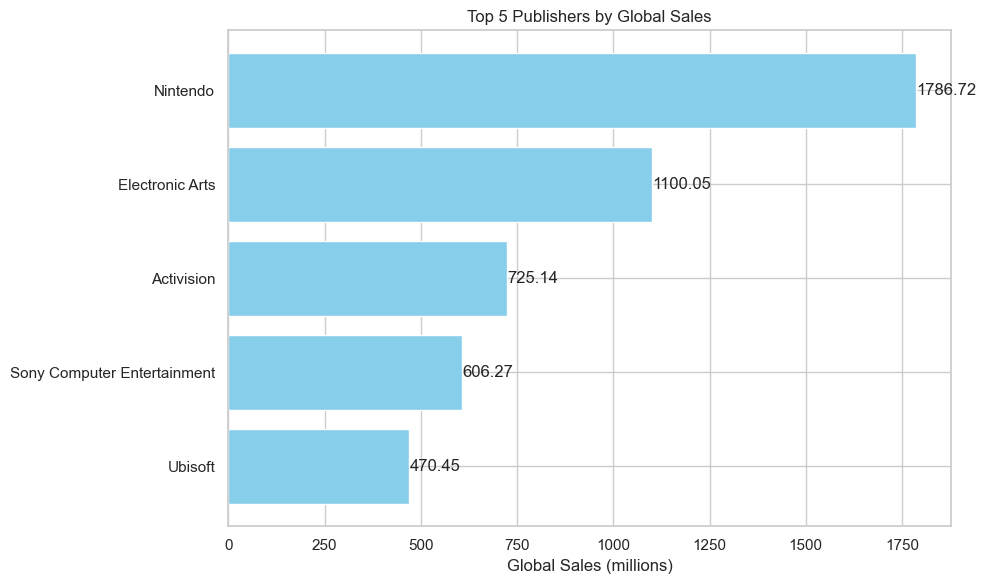

In [40]:
top_publishers = df.groupby("publisher")["global_sales"].sum().sort_values(ascending=False).head(5)

plt.figure()
bars = plt.barh(top_publishers.index[::-1], top_publishers.values[::-1], color="skyblue")
plt.title("Top 5 Publishers by Global Sales")
plt.xlabel("Global Sales (millions)")
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.2f}", va='center')
plt.tight_layout()
plt.show()

## VI. Part 1 - Question 2: Correlation Between NA and EU Sales (2010–2014)

### Analysis: 

##### Strong positive correlation (r = ~0.79) suggests sales strategies in North America and EU regions are aligned

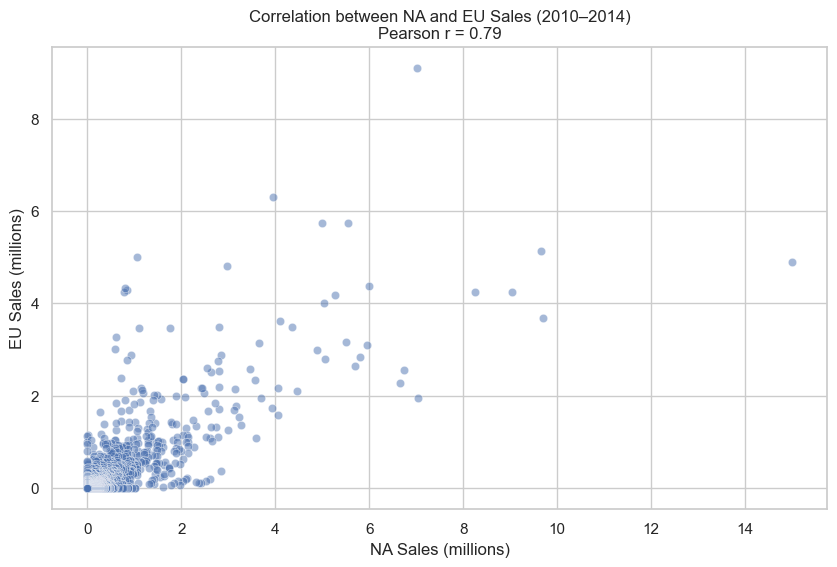

In [44]:
df_2010_2014 = df[(df["year"] >= 2010) & (df["year"] <= 2014)]
corr = df_2010_2014["na_sales"].corr(df_2010_2014["eu_sales"])

sns.scatterplot(data=df_2010_2014, x="na_sales", y="eu_sales", alpha=0.5)
plt.title(f"Correlation between NA and EU Sales (2010–2014)\nPearson r = {corr:.2f}")
plt.xlabel("NA Sales (millions)")
plt.ylabel("EU Sales (millions)")
plt.show()

# VII. Part 1 - Question 3: Distribution of Top 3 Genres by User Score

### Analysis:

#### Role-Playing, Platform, and Fighting games have the highest average user ratings.
##### Useful for prioritizing popular genres for stock.

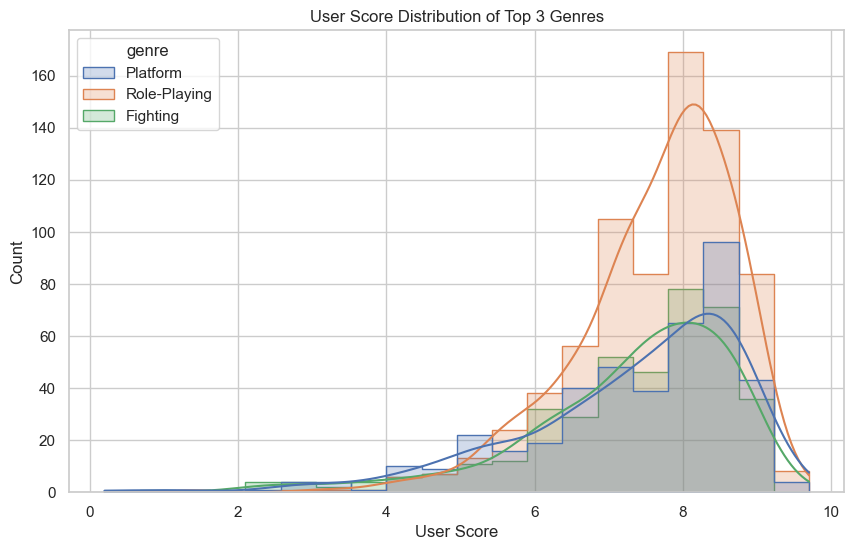

In [48]:
top_genres = df.groupby("genre")["user_score"].mean().sort_values(ascending=False).head(3).index.tolist()
genre_data = df[df["genre"].isin(top_genres)]

sns.histplot(data=genre_data, x="user_score", hue="genre", element="step", bins=20, kde=True)
plt.title("User Score Distribution of Top 3 Genres")
plt.xlabel("User Score")
plt.show()

# VIII. Part 1 - Question 4: Median EU Sales – Older vs. Newer Games

### Analysis:

##### Games released in or before 2005 have a higher median EU sales than newer ones.
###### Indicates longevity and market retention value for older titles.

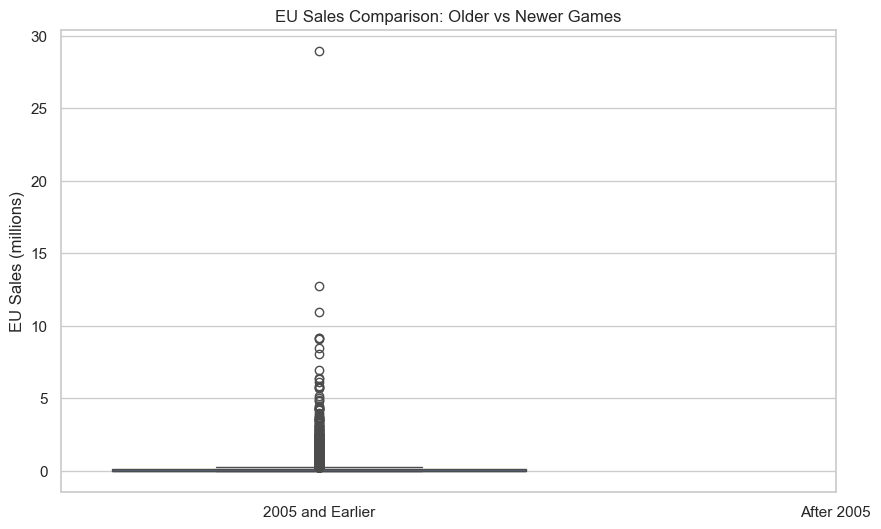

In [52]:
older = df[df["year"] <= 2005]["eu_sales"]
newer = df[df["year"] > 2005]["eu_sales"]

sns.boxplot(data=[older, newer])
plt.xticks([0, 1], ["2005 and Earlier", "After 2005"])
plt.title("EU Sales Comparison: Older vs Newer Games")
plt.ylabel("EU Sales (millions)")
plt.show()

# IX. Part 1 - Question 5: Most Common Developers

### Analysis:

##### Most games have unlisted developers (Unknown), followed by Ubisoft and EA Sports.
##### Helps identify potential publisher relationships or gaps in metadata.

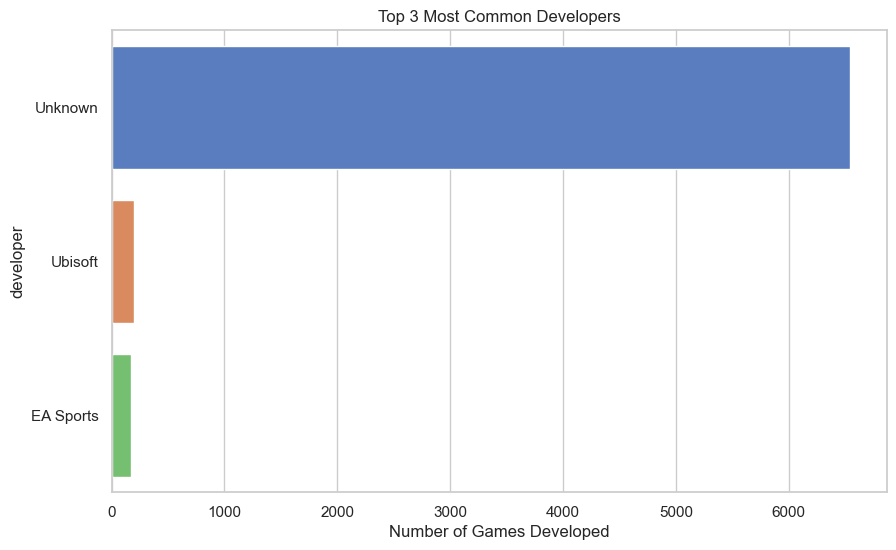

In [56]:
top_devs = df["developer"].value_counts().head(3)

sns.barplot(x=top_devs.values, y=top_devs.index, palette="muted")
plt.title("Top 3 Most Common Developers")
plt.xlabel("Number of Games Developed")
plt.show()

## Final Analysis and Insights